In [1]:
from ete3 import Tree
import Bio
import matplotlib.pyplot as plt

# 1. For .fasta:

### `Biotite`
https://www.biotite-python.org/tutorial/index.html

In [199]:
import utils_additional as utils
import numpy as np
import matplotlib.pyplot as plt
import biotite.sequence as seq
import biotite.sequence.align as align
import biotite.sequence.io.fasta as fasta
import biotite.database.entrez as entrez
import biotite.sequence.graphics as graphics


access fasta file:

In [4]:
genfilename = "data/sars-cov-2/2020_04_27/2020-05-11-gisaid_corrected_rus.fasta"

# parse sequences:
fasta_file = fasta.FastaFile.read(genfilename)

access sequence:

In [46]:
items = fasta_file.items()
name1, seq1str = next(items.__iter__())
name2, seq2str = next(items.__iter__())


extending alphabet and create sequence object:

In [51]:
# extending alphabet with '-' symbol:
alph = seq.Alphabet(['A', 'C', 'G', 'T', '-'])

seq1 = seq.GeneralSequence(alphabet=alph, sequence=seq1str)
seq2 = seq.GeneralSequence(alphabet=alph, sequence=seq2str)

# seq.ProteinSequence.get_alphabet?
# seq.ProteinSequence(entry[1])

create sustitution matrix:

In [62]:
# create a matrix by directly provding the ndarray
# containing the similarity scores
# (identity matrix in our case)
scores = np.identity(len(alph), dtype=int)
scores[-1,:] = -1
scores[:,-1] = -1
scores[-1,-1] = -2
matrix = align.SubstitutionMatrix(alph, alph, scores)
print("\n\nIdentity matrix\n")
print(matrix)



Identity matrix

    A   C   G   T   -
A   1   0   0   0  -1
C   0   1   0   0  -1
G   0   0   1   0  -1
T   0   0   0   1  -1
-  -1  -1  -1  -1  -2


alignment example:

In [2]:
seq1str = utils.gen_nucleotide_sequence(8)
seq2str = utils.gen_nucleotide_sequence(6)
print("seqs: ", [seq1str, seq2str])

seq1 = seq.NucleotideSequence(seq1str)
seq2 = seq.NucleotideSequence(seq2str)
print("alphabet")
print(seq1.get_alphabet())

seqs:  ['TTTAAGTA', 'ATAGAC']
alphabet
['A', 'C', 'G', 'T']


    A   C   G   T
A   5  -4  -4  -4
C  -4   5  -4  -4
G  -4  -4   5  -4
T  -4  -4  -4   5


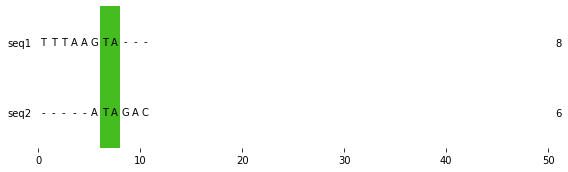

In [3]:
# Get BLOSUM62 matrix
matrix = align.SubstitutionMatrix.std_nucleotide_matrix()
print(matrix)

# Perform pairwise sequence alignment with affine gap penalty
# Terminal gaps are not penalized
alignments = align.align_optimal(seq1, seq2, matrix,
                                 gap_penalty=(-10, -1), terminal_penalty=False)

# Draw first and only alignment
# The color intensity indicates the similiarity
fig = plt.figure(figsize=(8.0, 2.5))
ax = fig.add_subplot(111)
graphics.plot_alignment_similarity_based(
    ax, alignments[0], matrix=matrix, labels=["seq1", "seq2"],
    show_numbers=True, show_line_position=True
)
fig.tight_layout()

plt.show()

In [201]:
align.align_multiple?
seq.GeneralSequence

aligment:
T-TAACTA
-GGC--CG
TAGCTTCG
TA-CAT-A

distances:
[[0.        2.350316  1.2310306 1.0908663]
 [2.350316  0.        1.0573694 2.2064412]
 [1.2310306 1.0573694 0.        1.0367744]
 [1.0908663 2.2064412 1.0367744 0.       ]]

tree:
labels: (((seq4,seq3),seq1),seq2);
original sequences: (((TACATA,TAGCTTCG),TTAACTA),GGCCG);
aligmented sequences: (((TA-CAT-A,TAGCTTCG),T-TAACTA),-GGC--CG);


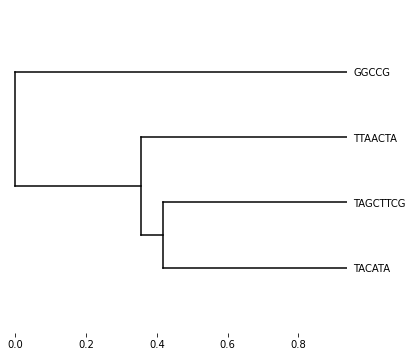

In [22]:
# some times not work, try again:
sequences_str = [utils.gen_nucleotide_sequence(i) for i in [7, 5, 8, 6]]
sequences = [seq.NucleotideSequence(seq_str) for seq_str in sequences_str]

alignment, order, tree, distances = align.align_multiple(
    sequences, matrix)
print("aligment:")
print(alignment)

print("\ndistances:")
print(distances)

print("\ntree:")
print("labels:", tree.to_newick(
         labels=["seq1", "seq2", "seq3", "seq4"], include_distance=False))

print("original sequences:", tree.to_newick(
         labels=sequences_str, include_distance=False))

print("aligmented sequences:", tree.to_newick(
         labels=alignment.get_gapped_sequences(), include_distance=False))

ig, ax = plt.subplots(figsize=(6.0, 6.0))
graphics.plot_dendrogram(ax, tree, labels=sequences_str)
fig.tight_layout()

In [26]:
import biotite.application.blast as blast

In [27]:
blast.BlastAlignment??

### `Bio`

In [2]:
from Bio import SeqIO

genfilename = "data/sars-cov-2/2020_04_27/2020-05-11-gisaid_corrected_rus.fasta"

records_gen = SeqIO.parse(genfilename, "fasta")


record = next(records_gen)

print("len(record):")
print(len(record))

print("\nrecord.id:")
print(record.id)

print("\nrecord.name:")
print(record.name)

print("\nrecord.description:")
print(record.description)

# long string:
# print(record.seq)

print("\nSeqRecord:")
print(record)

len(record):
29941

record.id:
hCov19/France/Lyon_06464_/2020|EPI_ISL_416753

record.name:
hCov19/France/Lyon_06464_/2020|EPI_ISL_416753

record.description:
hCov19/France/Lyon_06464_/2020|EPI_ISL_416753

SeqRecord:
ID: hCov19/France/Lyon_06464_/2020|EPI_ISL_416753
Name: hCov19/France/Lyon_06464_/2020|EPI_ISL_416753
Description: hCov19/France/Lyon_06464_/2020|EPI_ISL_416753
Number of features: 0
Seq('------------------------------------------------------...---', SingleLetterAlphabet())


In [16]:
frequencies = dict([(base, record.seq.count(base))
                    for base in ["A", "C", "G", "T", "-"]])
print("frequencies:")
print(frequencies)
total = sum(frequencies.values())
print("total:")
print(total)
for base in frequencies:
    print(base, frequencies[base]/total)

frequencies:
{'A': 8889, 'C': 5461, 'G': 5845, 'T': 9565, '-': 181}
total
29941
A 0.29688387161417457
C 0.18239203767409237
G 0.195217260612538
T 0.31946160782872984
- 0.0060452222704652486


In [63]:
# print(record.seq)

In [71]:
# find longest seq

import re

seq = str(record.seq).replace("-", "")

lbases = {}

for base in ["A", "C", "G", "T"]:
    longest = re.findall('[%s]+' % base, seq)
    longest.sort(key=lambda elm: len(elm),reverse=True)
    lbases[base] = len(longest[0])
print(lbases)
    


{'A': 6, 'C': 5, 'G': 5, 'T': 8}


In [66]:
replacer = (lambda seq, bases: replacer(seq.replace(bases.pop(),
                                                    str(len(bases))), bases)
            if len(bases)!=0 else seq)
# ["A"->0,"C"->1,"G"->2,"T"->3,"-"->4]
seq1 = replacer(str(seq), ["A", "C", "G", "T"])


In [48]:
'''
from functools import reduce

# removing long seq's:
lseq = [int(base) for base in seq]
f = lambda acc, x: acc+[x] if (x!=acc[-1]) else acc
rlseq = reduce(f, lseq, [5, 5])
'''

In [50]:
'''
# rlseq frequencies:
rseq = "".join([str(base) for base in rlseq])
rlfrequencies = dict([(base, rseq.count(base)) for base in ["0","1","2","3","4","5"]])
rlfrequencies
'''

{'0': 6055, '1': 4580, '2': 4756, '3': 6357, '4': 15, '5': 2}

<BarContainer object of 300 artists>

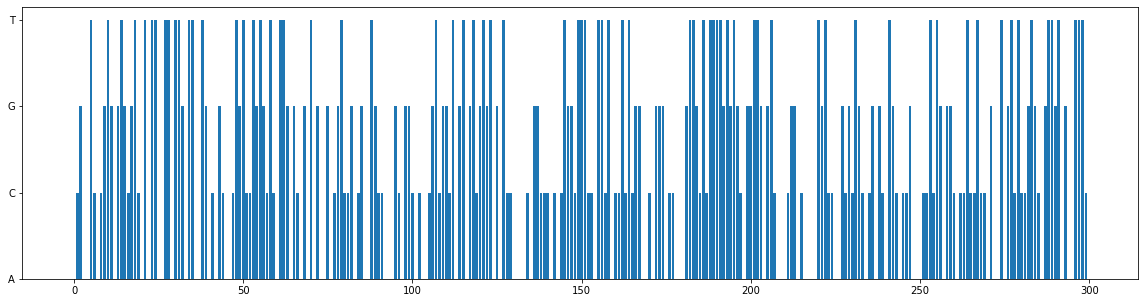

In [70]:
# 5 is init and must be igrnored
N = 300
xs = list(range(N))
plt.figure(figsize=(20, 5))

# ["A"->0,"C"->1,"G"->2,"T"->3,"-"->4]
plt.yticks([0,1,2,3], ('A', 'C', 'G', 'T'))
plt.bar(xs,list(seq[:N]))

# 2. For trees:

### `Dendropy`
https://dendropy.org/primer/index.html

In [104]:
import dendropy

file_tree = "data/sars-cov-2/2020_04_27/sarscov2_20200427.fin.treefile.tre"

tree1 = dendropy.Tree.get(path=file_tree, schema="nexus")


collect ru nodes:

In [151]:
test_ru = (lambda node: "russ" in str(node.taxon).lower()
           if node.taxon is not None else False)
nodes_ru =tree1.nodes(test_ru)
nodes_ru.sort(key=lambda node: node.level())

edges = tree1.edges()
node = nodes_ru[0]
edge = edges[-3]
print("node.level(): ",node.level())
print("\nnode.description():")
print(node.description())

node.level():  25

node.description():
Node object at 0x7fb0d9177cc0<Node object at 0x7fb0d9177cc0: 'None' (<Taxon 0x7fb0d9177d30 'Russia/StPetersburg-82005/2020|EPI_ISL_428897|2020-03-24'>)>
    [Edge]
        Edge object at 0x7fb0d9177cf8 (140397533166840, Length=6.6e-05)
    [Taxon]
         Taxon object at 0x7fb0d9177d30: 'Russia/StPetersburg-82005/2020|EPI_ISL_428897|2020-03-24'
    [Parent]
        Node object at 0x7fb0d9177a90<Node object at 0x7fb0d9177a90: 'None' (None)>
    [Children]
        None


In [ ]:
'''
print(len(node.child_nodes()))
print(node.taxon)
print(edge.label)
print(node.description())
print(edge.description())
'''

ru tree:

In [154]:
tree_ru = tree1.extract_tree(node_filter_fn=test_ru)

In [155]:
tree_ru.print_plot()

              / Russia/Moscow-80402/2020|EPI_ISL_428905|2020-03-23            
              +                                                               
              + Russia/Moscow-67117/2020|EPI_ISL_428875|2020-03-16            
              |                                                               
             /+ Russia/Krasnoyarsk-66501/2020|EPI_ISL_428871|2020-03-13       
             ||                                                               
             +\ Russia/StPetersburg-RII3997/2020|EPI_ISL_420081|2020-03-18    
             |                                                                
             |/ Russia/StPetersburg-RII4386V/2020|EPI_ISL_427312|2020-03-29   
             ++                                                               
             |\ Russia/StPetersburg-RII5247S/2020|EPI_ISL_430091|2020-04-10   
             |                                                                
            /+- Russia/Sverdlovsk-84302/2020|EPI_ISL

statistics:

In [153]:
from dendropy.calculate import treemeasure

In [162]:
print(treemeasure.B1(tree_ru))
print(treemeasure.colless_tree_imbalance(tree_ru))
# print(treemeasure.pybus_harvey_gamma(tree_ru))
print(treemeasure.sackin_index(tree_ru))
print(treemeasure.treeness(tree_ru))

51.98150933760357
0.19027752584799565
17.96
0.35883171070931846


comparing trees

In [178]:
from dendropy.calculate import treecompare

In [163]:
nodes_ru = tree_ru.nodes()

In [177]:
# print(nodes_ru[2].description())
tree_ru1 = dendropy.Tree(seed_node=nodes_ru[3])
tree_ru2 = dendropy.Tree(seed_node=nodes_ru[4])
print("len(tree_ru1):", len(tree_ru1.nodes()))
print("len(tree_ru2):", len(tree_ru2.nodes()))


len(tree_ru1): 68
len(tree_ru2): 223


In [183]:
print("\nUnweighted Robinson-Foulds distance:")
print(treecompare.symmetric_difference(tree1, tree2))

print("\nWeighted Robinson-Foulds distance:")
print(treecompare.weighted_robinson_foulds_distance(tree1, tree2))

print("\nEuclidean distance:")
print(treecompare.euclidean_distance(tree1, tree2))

Unweighted Robinson-Foulds distance:
11820
Weighted Robinson-Foulds distance:
0.21349300000001278
Euclidean distance:
0.017292319884850478


### `Bio.Phylo`

In [4]:
file_tree = "data/sars-cov-2/2020_04_27/sarscov2_20200427.fin.treefile.tre"

In [6]:
from Bio import Phylo
# expensive:
tree = Phylo.read(file_tree, "nexus")


### 2.0. `Phylo.draw` failure (too long):

In [ ]:
# failure (too long) ():
# Phylo.draw?

### 2.1. `Phylo.draw  # (to file)` for small trees only:

In [2]:
# for small trees only:
# tree.ladderize()   # Flip branches so deeper clades are displayed at top
# Phylo.draw(tree, do_show=False)
### Phylo.draw(tree, axes=axes, label_func=get_label, do_show=False)

# plt.savefig("data_local/tmp.png")

### 2.2. `Phylo.draw_ascii` not very convenient (fast):

In [ ]:
# for small trees only:
# Phylo.draw_ascii(tree)

### 2.3. `Phylo.convert` + `ete3.Tree` "colors" and "labels" not understood. Need manual fixation

In [ ]:
file_tree_newick = "results/sars-cov-2_2020_04_27.txt"

In [ ]:
# failure (colors, labels not understood):
Phylo.convert(file_tree, "nexus", file_tree_newick, "newick")

In [ ]:
# fixing color, label:
with open(file_tree_newick, "r") as f:
    data = f.read()
out = data
out = out.replace(",!color=#ff0000", '')\
            .replace("[&!color=#0000ff]", '')\
            .replace(",!color=#0000ff",'')\
            .replace("[\[&!color=#ff0000\]]", '')\
            .replace("[\[&label=ete3_quotref_301\]]",'')
# out = data.replace("\\","")# .replace("''","'")# .replace("\'","'")#.replace("''","'")
# out = data.replace("''","'").replace("\\","").replace("''","")
#file_tree_newick_fixed = "data_local/sars-cov-2_2020_04_27_v1.txt"
#with open(file_tree_newick_fixed, "w") as f:
#    f.write(out)
# print(out)
# print("''" in out)

In [ ]:
# failure 
# tree = Tree(out,format=1,quoted_node_names=True)
# tree = Tree(file_tree_newick,format=1, quoted_node_names=True)